**Linear Regression with Python**<br>
**PIT in ES209 Engineering Data Analysis**<br>
*Timajo, Kurt Vincent O.*<br>
*CpE-1C*

### **Predicting Canada's Per Capita Income in the year 2025**<br>
using Linear Regression in Python

This Regression Analysis has two parts:<br><br>
&emsp; **Part 1: Linear Regression with outliers** *(outliers not removed)* <br>
&emsp; **Part 2: Linear Regression without outliers** *(outliers removed)*

In [828]:
import pandas as pd  
import statsmodels.api as sm  
import matplotlib.pyplot as plt
import numpy as np

In [829]:
df = pd.read_csv('canada-capita-income.csv')
df

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


#### **Scatter plot of Canada per capita income**

<AxesSubplot:xlabel='year', ylabel='per capita income (US$)'>

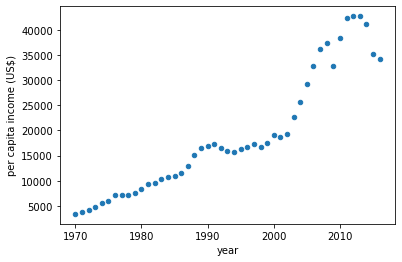

In [830]:
df.plot(x="year",y="per capita income (US$)", kind="scatter")

In [831]:
dep_var = df["per capita income (US$)"] #dependent variable
exp_var = df["year"] #explanatory/independent variable

In [832]:
exp_var = sm.add_constant(exp_var)

#### **Correlation Coefficient**

In [833]:
x_simple = np.array(df["year"])
y_simple = np.array(df["per capita income (US$)"])
rho = np.corrcoef(x_simple, y_simple)
print(f"Correlation Coefficient: \n{rho}")

Correlation Coefficient: 
[[1.         0.94388395]
 [0.94388395 1.        ]]


&emsp; r = **0.94**<br>&emsp; Strength: **Strong Positive Correlation**

### Part 1: Linear Regression with outliers

&emsp; *Fitting the linear regression model*

In [834]:
model = sm.OLS(dep_var,exp_var)
result = model.fit()  

#### **Linear Regression Results**

In [835]:
print(result.summary())

                               OLS Regression Results                              
Dep. Variable:     per capita income (US$)   R-squared:                       0.891
Model:                                 OLS   Adj. R-squared:                  0.888
Method:                      Least Squares   F-statistic:                     367.5
Date:                     Thu, 09 Jun 2022   Prob (F-statistic):           2.80e-23
Time:                             18:08:04   Log-Likelihood:                -455.71
No. Observations:                       47   AIC:                             915.4
Df Residuals:                           45   BIC:                             919.1
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

#### **Interpretation of the Regression Results**<br>
*R-squared*<br>
*F-statistic*<br>
*coef*<br>
*P>|t|*<br>

**Predicting the per capita income of Canada in the year 2025**

In [836]:
_year_to_predict = 2025
predic = result.predict([1,_year_to_predict])
print(f"Predicted Canada's per capita income (year {_year_to_predict}): ${predic}")

Predicted Canada's per capita income (year 2025): $[45431.01947053]


#### **Line of best fit (regression line)**

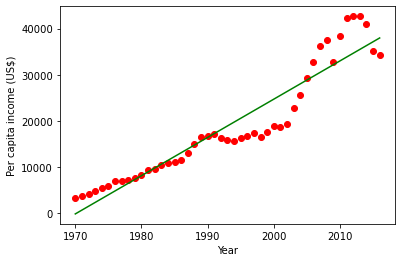

In [858]:
pred_plot = plt.figure()
plt.xlabel("Year")
plt.ylabel("Per capita income (US$)")
pred_plot = plt.plot(df["year"],df["per capita income (US$)"],'ro',label="data")
pred_plot = plt.plot(df["year"],result.fittedvalues,'b-',label="regression line")

**Determining the linear equation using linear_model from sklearn**

In [838]:
from sklearn import linear_model

In [839]:
_year = df.drop('per capita income (US$)',axis='columns')

In [840]:
_pci = df['per capita income (US$)']

In [841]:
LR = linear_model.LinearRegression()
LR.fit(_year,_pci)

LinearRegression()

Linear Equation **Y = mX + b** <br>where m = slope ;  X = year variable ; b = intercept

&emsp; *Determining the **slope m***

In [842]:
print(f"Slope m = {LR.coef_}")

Slope m = [828.46507522]


&emsp; *Determining the **intercept b***

In [843]:
print(f"Intercept b = {LR.intercept_}")

Intercept b = -1632210.7578554575


### *Equation of the Line of best fit:* <br>
**Y = 828.46507522(X) - 1632210.7578554575**

&emsp; *Predicting using the prediction function*

In [844]:
predic = LR.predict([[_year_to_predict]])
print(f"Predicted Canada's per capita income (year {_year_to_predict}): ${predic}")

Predicted Canada's per capita income (year 2025): $[45431.01947053]


c:\Users\djkur\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


&emsp; *Using the **line of best fit** to predict the per capita income for year x=2020*

In [845]:
y = (828.46507522*_year_to_predict) - 1632210.7578554575
print(f"Predicted Canada's per capita income (year {_year_to_predict}): ${y}")

Predicted Canada's per capita income (year 2025): $45431.01946504251


### Part 2: Linear Regression without outliers

&emsp; **Finding outliers**

In [846]:
#initial shape of the raw data frame
df.shape

(47, 2)

In [847]:
df.describe()

,year,per capita income (US$)
count,47.000000,47.000000
mean,1993.000000,18920.137063
std,13.711309,12034.679438
min,1970.000000,3399.299037
25%,1981.500000,9526.914515
50%,1993.000000,16426.725480
75%,2004.500000,27458.601420
max,2016.000000,42676.468370


&emsp; *Plotting the data frame with boxplot to spot outliers*

In [848]:
def plot_boxplot(dframe,feature):
    dframe.boxplot(column=[feature])
    plt.grid(False)
    plt.show()

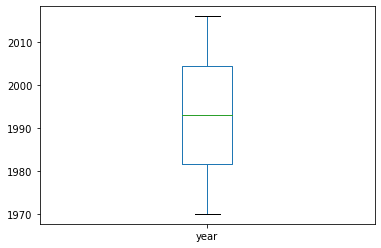

In [849]:
plot_boxplot(df,"year")

&emsp; *no outlier found in year*

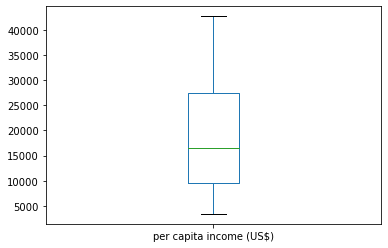

In [850]:
plot_boxplot(df,"per capita income (US$)")

&emsp; *no outlier found in per capita income*

&emsp; Verifying the boxplot that **there is no outlier** 

In [851]:
def outliers(dframe,feature):
    Q1 = dframe[feature].quantile(0.25)
    Q3 = dframe[feature].quantile(0.75)
    IQR = Q3-Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    ls = df.index[ (df[feature] < lower_bound) | (df[feature] > upper_bound)]
    return ls

In [852]:
index_list = []
for feature in ['year','per capita income (US$)']:
    index_list.extend(outliers(df, feature))

In [853]:
#list of outliers index
index_list

[]

In [854]:
def remove(dframe,ind_ls):
    ind_ls = sorted(set(ind_ls))
    dframe = dframe.drop(ind_ls)
    return dframe

In [855]:
#cleaned data frame (no outliers)
df_cleaned = remove(df,index_list)


In [856]:
#new shape of the data frame
df_cleaned.shape

(47, 2)

<AxesSubplot:xlabel='year', ylabel='per capita income (US$)'>

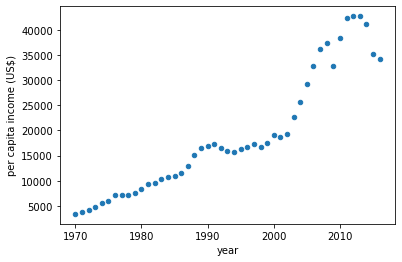

In [857]:
df_cleaned.plot(x="year",y="per capita income (US$)", kind="scatter")

**Part 2 Conclusion**<br>
&emsp;Since the function outliers() returned an empty list, therefore, it is true that there is **no outlier** in the dataframe ***df***. It is verified by comparing the initial shape (*df.shape*) and the final shape of the cleaned dataframe (*df_cleaned.shape*) which are both equal to **(47,2)**.